In [42]:
import pandas as pd
import matplotlib.pyplot as plt #importar biblioteca y renombrarla a plt
import numpy as np

def readCsv(nombre):
    valores = read_csv(nombre, header = None).values
   
    return valores.astype(float)



In [43]:
def calc_costo(dframe, th0, th1):
    """ Calcula el costo J """
    poblacion = dframe[0:,0]
    prediccion = poblacion * th1 + th0
    ganancia = dframe[0:,1]
    return np.sum(np.square((prediccion - ganancia)) / len(dframe) / 2.0)

In [44]:
def grad_desc(dframe, th0, th1, alpha):
    """ Implementa un paso en el algoritmo de descenso en gradiente """
    length = len(dframe)
    array = np.ones((length,3))
    array[0:,0] = dframe[0:,0]
    array[0:,1] = dframe[0:,1]
    dframe=array
    dframe[0:,2] = dframe[0:,0] * th1 + th0
    th0 = th0 - alpha / length * np.sum((dframe[0:,2] - dframe[0:,1]))
    th1 = th1 - alpha / length * np.sum(((dframe[0:,2] - dframe[0:,1]) * dframe[0:,0]))
    return th0, th1

In [69]:
def test_graph(df, iteraciones):
    """ implementa el método del descenso en el dataframe """
    theta0, theta1 = 0, 0
    alpha = 0.01
    for elem in range(iteraciones):
        theta0, theta1 = grad_desc(df, theta0, theta1, alpha)

    costo = calc_costo(df, theta0, theta1)
    plt.plot(df[0:,0],df[0:,1],'x')
    plt.plot (df[0:,0],df[0:,0]*theta1 + theta0)
    plt.show()


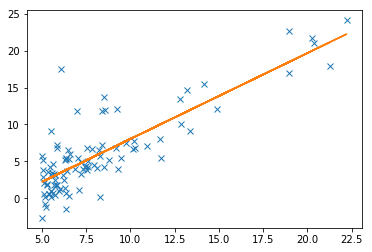

In [70]:

datos = readCsv("ex1data1.csv")
test_graph(datos, 1500)

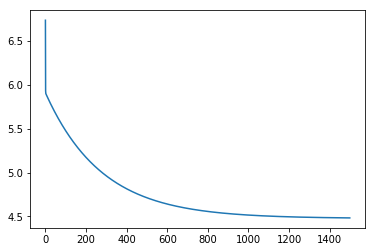

In [71]:
def plot_with_cost(df, iteraciones):
    """ Calcula el costo por cada iteración """
    valores_costo = []
    theta0, theta1 = 0, 0
    alpha = 0.01
    for elem in range(iteraciones):
        theta0, theta1 = grad_desc(df, theta0, theta1, alpha)
        costo = calc_costo(df, theta0, theta1)
        valores_costo.append(costo)
    plt.plot(range(iteraciones), valores_costo)
    plt.show()

plot_with_cost(datos, 1500)

In [43]:
def normaliza(valores):
    mediax = np.mean(valores[0:,0])
    mediay = np.mean(valores[0:,1])
    mediaz = np.mean(valores[0:,2])
    desTx = np.std(valores[0:,0])
    desTy = np.std(valores[0:,1])
    desTz = np.std(valores[0:,2])
    #normalizamos los valores
    valores[0:,0] = (valores[0:,0]-mediax)/desTx
    valores[0:,1] = (valores[0:,1]-mediay)/desTy
    valores[0:,2] = (valores[0:,2]-mediaz)/desTz
    mu = [mediax,mediay,mediaz]
    sigma = [desTx,desTy,desTz]
    return valores, mu, sigma
def compute_cost(features,values,theta):
    
    m = len(values)
    sum_of_square_errors = np.square(np.dot(features,theta)-values).sum()
    cost = sum_of_square_errors/ (2*m)
    return cost

def descensoGradiente(features, values, theta, alpha, num_iterations):
    m = len(values)
    cost_history = []
    
    for i in range(num_iterations):
        predicted_values = np.dot(features,theta)
        theta = theta - alpha / m * np.dot((predicted_values - values),features)
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
    return theta, pandas.Series(cost_history)

def regLinealMultiplesVariables():
    fig = plt.figure()
    x = readCsv("ex1data2.csv") #Triple array valores[x][y][z]
    #precio = m * pies^2 + m1 * numHabitaciones
    datos = normaliza(x)
    normalizado = datos[0]
    medias = datos[1]
    desviaEs = datos[2]
    features = [normalizado[0:,0],normalizado[0:,1]]
    theta = np.ones()
    descensoGradiente(features,normalizado[0:,2],theta,0.1,1600)
    
regLinealMultiplesVariables()

ValueError: shapes (2,47) and (2,47) not aligned: 47 (dim 1) != 2 (dim 0)

<Figure size 432x288 with 0 Axes>